In [696]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [697]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [698]:
df = pd.read_csv('loan_dataset.csv')

#### Looking at the dataset

In [699]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [700]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [701]:
df.shape

(614, 13)

### Checking for Null values

In [702]:
df.isnull().sum()


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [703]:
df[df.isnull().any(axis=1)]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
11,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
16,LP001034,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,Y
19,LP001041,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,LP002933,NaN,No,3+,Graduate,Yes,9357,0.0,292.0,360.0,1.0,Semiurban,Y
597,LP002943,Male,No,NaN,Graduate,No,2987,0.0,88.0,360.0,0.0,Semiurban,N
600,LP002949,Female,No,3+,Graduate,NaN,416,41667.0,350.0,180.0,NaN,Urban,N
601,LP002950,Male,Yes,0,Not Graduate,NaN,2894,2792.0,155.0,360.0,1.0,Rural,Y


Null values exist

### Check For Duplicate Values

In [704]:
df.duplicated().sum()


np.int64(0)

In [705]:
df.iloc[:, 0].duplicated().sum()


np.int64(0)

Duplicate values donot exist

### Handling Missing Values

In [706]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [707]:
# prompt: show me all those rows where Gender is neither Male nor Female

df[~df['Gender'].isin(['Male', 'Female'])]


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
126,LP001448,NaN,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y
171,LP001585,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
188,LP001644,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y
314,LP002024,NaN,Yes,0,Graduate,No,2473,1843.0,159.0,360.0,1.0,Rural,N
334,LP002103,NaN,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,Y
460,LP002478,NaN,Yes,0,Graduate,Yes,2083,4083.0,160.0,360.0,NaN,Semiurban,Y
467,LP002501,NaN,Yes,0,Graduate,No,16692,0.0,110.0,360.0,1.0,Semiurban,Y
477,LP002530,NaN,Yes,2,Graduate,No,2873,1872.0,132.0,360.0,0.0,Semiurban,N
507,LP002625,NaN,No,0,Graduate,No,3583,0.0,96.0,360.0,1.0,Urban,N


In [708]:
# prompt: Count no.of rows which have Gender == Male

df[df['Gender'] == 'Male'].shape[0]


489

In [709]:
df[df['Gender'] == 'Female'].shape[0]

112

In [710]:
df['Gender'].fillna('Male', inplace=True)

In [711]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [712]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [713]:
df['Dependents']

0       0
1       1
2       0
3       0
4       0
       ..
609     0
610    3+
611     1
612     2
613     0
Name: Dependents, Length: 614, dtype: object

In [714]:
df['Self_Employed'].fillna('No',inplace=True)

In [715]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [716]:
df['Dependents'].fillna('0',inplace=True)

In [717]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               3
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [718]:
df[df['Married'].isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,LP001357,Male,NaN,0,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
228,LP001760,Male,NaN,0,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
435,LP002393,Female,NaN,0,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y


In [719]:
df.dropna(subset=['Married'], inplace=True)

In [720]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [721]:
df[df['Married'].isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [722]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 611 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            611 non-null    object 
 1   Gender             611 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         611 non-null    object 
 4   Education          611 non-null    object 
 5   Self_Employed      611 non-null    object 
 6   ApplicantIncome    611 non-null    int64  
 7   CoapplicantIncome  611 non-null    float64
 8   LoanAmount         590 non-null    float64
 9   Loan_Amount_Term   597 non-null    float64
 10  Credit_History     561 non-null    float64
 11  Property_Area      611 non-null    object 
 12  Loan_Status        611 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 66.8+ KB


In [723]:
df.shape

(611, 13)

In [724]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,611.000000,611.000000,590.000000,597.000000,561.000000
mean,5399.513912,1627.972046,146.369492,341.909548,0.841355
std,6120.764249,2931.747971,85.729343,64.900325,0.365671
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2875.500000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1213.000000,127.500000,360.000000,1.000000
75%,5790.000000,2304.000000,168.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


#### Imputation

In [725]:
df['LoanAmount'].fillna(146.36, inplace=True)

In [726]:
df['Loan_Amount_Term'].fillna(341.90, inplace=True)

In [727]:
df['Credit_History'].fillna(0, inplace=True)

In [728]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [729]:
df.shape

(611, 13)

### Label Encoding

In [730]:
df.replace({'Loan_Status' : {"Y" : 1, "N" : 0}}, inplace=True)

In [731]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.36,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.00,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.00,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.00,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.00,360.0,1.0,Urban,1


In [732]:
df['Dependents'].value_counts()

Dependents
0     357
1     102
2     101
3+     51
Name: count, dtype: int64

In [733]:
df.replace({'Dependents' : {"3+":4, "1": 1, "2": 2, "0": 0}}, inplace=True)

In [734]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 611 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            611 non-null    object 
 1   Gender             611 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         611 non-null    int64  
 4   Education          611 non-null    object 
 5   Self_Employed      611 non-null    object 
 6   ApplicantIncome    611 non-null    int64  
 7   CoapplicantIncome  611 non-null    float64
 8   LoanAmount         611 non-null    float64
 9   Loan_Amount_Term   611 non-null    float64
 10  Credit_History     611 non-null    float64
 11  Property_Area      611 non-null    object 
 12  Loan_Status        611 non-null    int64  
dtypes: float64(4), int64(3), object(6)
memory usage: 66.8+ KB


### Data Visualization

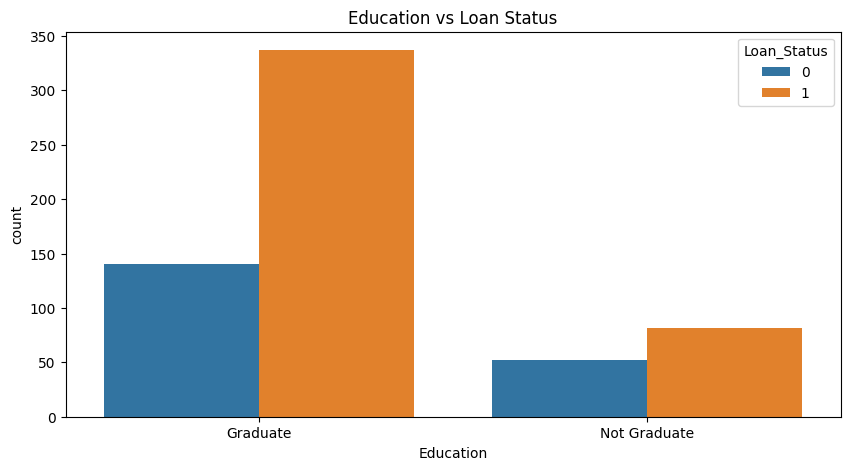

In [735]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Education', hue='Loan_Status', data=df)
plt.title('Education vs Loan Status')
plt.show()

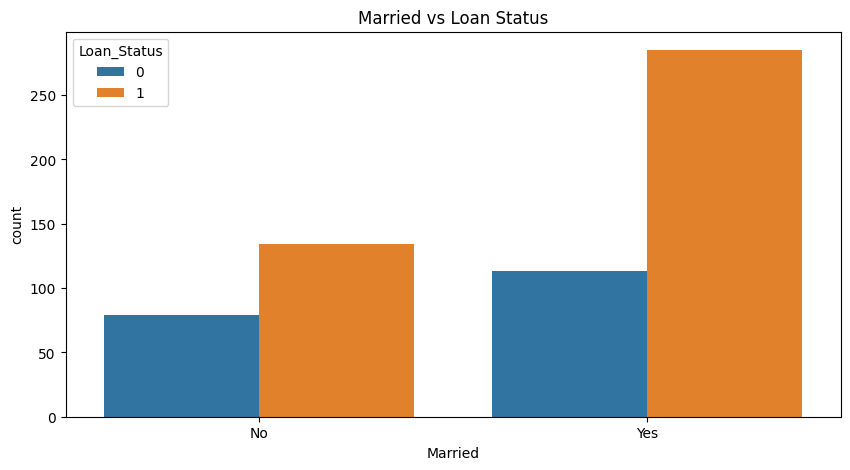

In [736]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Married', hue='Loan_Status', data=df)
plt.title('Married vs Loan Status')
plt.show()

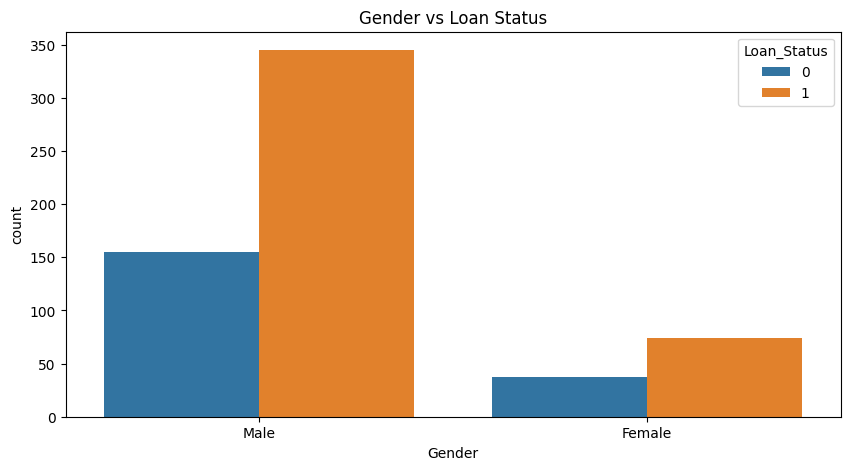

In [737]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Gender', hue='Loan_Status', data=df)
plt.title('Gender vs Loan Status')
plt.show()

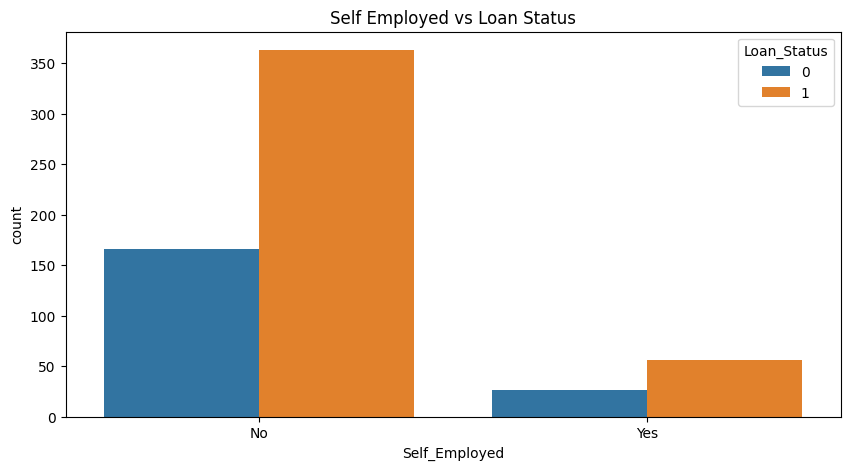

In [738]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Self_Employed', hue='Loan_Status', data=df)
plt.title('Self Employed vs Loan Status')
plt.show()

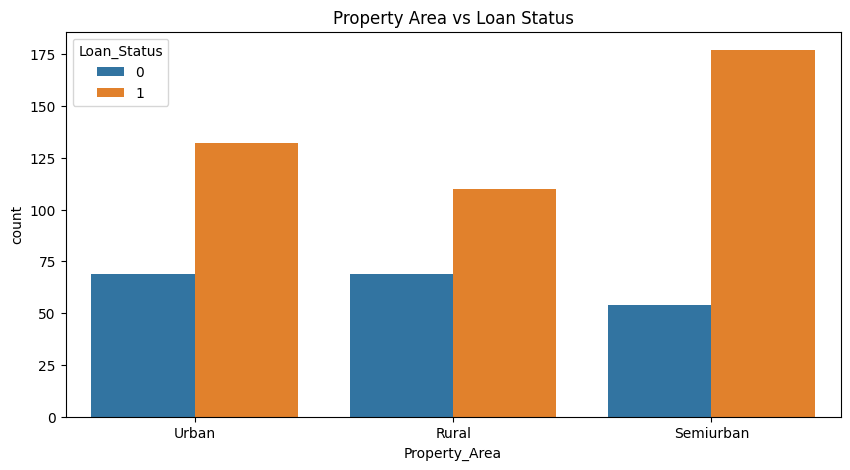

In [739]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Property_Area', hue='Loan_Status', data=df)
plt.title('Property Area vs Loan Status')
plt.show()

In [740]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.36,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.00,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.00,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.00,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.00,360.0,1.0,Urban,1


### Categorical to Numerical

In [741]:
df.replace({'Education' : {"Graduate": 1 ,"Not Graduate": 0}}, inplace=True)

In [742]:
df.replace({'Married' : {"Yes": 1 ,"No": 0}}, inplace=True)

In [743]:
df.replace({'Gender' : {"Male": 1 ,"Female": 0}}, inplace=True)

In [744]:
df.replace({'Self_Employed' : {"Yes": 1 ,"No": 0}}, inplace=True)

In [745]:
df.replace({'Property_Area' : {"Rural": 0 ,"Semiurban": 1, "Urban": 2}}, inplace=True)

In [746]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.36,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.00,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.00,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.00,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.00,360.0,1.0,2,1


### Defining Input and Output

In [747]:
X = df.drop(columns=['Loan_ID', 'Loan_Status'], axis=1)
y = df['Loan_Status']

In [748]:
print(X)

     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0         1        0           0          1              0             5849   
1         1        1           1          1              0             4583   
2         1        1           0          1              1             3000   
3         1        1           0          0              0             2583   
4         1        0           0          1              0             6000   
..      ...      ...         ...        ...            ...              ...   
609       0        0           0          1              0             2900   
610       1        1           4          1              0             4106   
611       1        1           1          1              0             8072   
612       1        1           2          1              0             7583   
613       0        0           0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

In [749]:
print(y)

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 611, dtype: int64


### Train Test Split

In [750]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,random_state=3)

In [751]:
# Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred)
print("Accuracy Score of Logistic Regression:", accuracy_lr)

# Decision Tree Classifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred)
print("Accuracy Score of Decision Tree Classifier:", accuracy_dt)

# Random Forest Classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred)
print("Accuracy Score of Random Forest Classifier:", accuracy_rf)

# KNN
model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred)
print("Accuracy Score of KNN:", accuracy_knn)

# SVM
model = svm.SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred)
print("Accuracy Score of SVM:", accuracy_svm)


Accuracy Score of Logistic Regression: 0.7886178861788617
Accuracy Score of Decision Tree Classifier: 0.7154471544715447
Accuracy Score of Random Forest Classifier: 0.7804878048780488
Accuracy Score of KNN: 0.5772357723577236
Accuracy Score of SVM: 0.6829268292682927


##### AUC-ROC

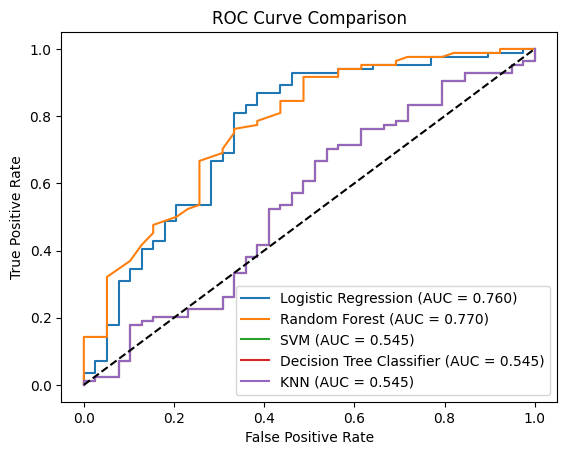

In [752]:
from sklearn.metrics import roc_curve, roc_auc_score

# Initialize models
model_1 = LogisticRegression()
model_2 = RandomForestClassifier()
model_3 = svm.SVC(probability=True)
model_4 = DecisionTreeClassifier()
model_5 = KNeighborsClassifier()

# Train models
model_1.fit(X_train, y_train)
model_2.fit(X_train, y_train)
model_3.fit(X_train, y_train)
model_4.fit(X_train, y_train)
model_5.fit(X_train, y_train)



# Calculate predicted probabilities for ROC AUC
y_pred_prob_1 = model_1.predict_proba(X_test)[:, 1]
y_pred_prob_2 = model_2.predict_proba(X_test)[:, 1]
y_pred_prob_3 = model_3.predict_proba(X_test)[:, 1]
y_pred_prob_4 = model_3.predict_proba(X_test)[:, 1]
y_pred_prob_5 = model_3.predict_proba(X_test)[:, 1]

# Calculate ROC curves
fpr_1, tpr_1, _ = roc_curve(y_test, y_pred_prob_1)
fpr_2, tpr_2, _ = roc_curve(y_test, y_pred_prob_2)
fpr_3, tpr_3, _ = roc_curve(y_test, y_pred_prob_3)
fpr_4, tpr_4, _ = roc_curve(y_test, y_pred_prob_3)
fpr_5, tpr_5, _ = roc_curve(y_test, y_pred_prob_3)

# Plot ROC curves
plt.plot(fpr_1, tpr_1, label='Logistic Regression (AUC = {:.3f})'.format(roc_auc_score(y_test, y_pred_prob_1)))
plt.plot(fpr_2, tpr_2, label='Random Forest (AUC = {:.3f})'.format(roc_auc_score(y_test, y_pred_prob_2)))
plt.plot(fpr_3, tpr_3, label='SVM (AUC = {:.3f})'.format(roc_auc_score(y_test, y_pred_prob_3)))
plt.plot(fpr_4, tpr_4, label='Decision Tree Classifier (AUC = {:.3f})'.format(roc_auc_score(y_test, y_pred_prob_4)))
plt.plot(fpr_5, tpr_5, label='KNN (AUC = {:.3f})'.format(roc_auc_score(y_test, y_pred_prob_5)))

# Plot diagonal line for random guessing
plt.plot([0, 1], [0, 1], 'k--')

# Configure plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.show()


In [753]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Generate a dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Initialize models
model_1 = LogisticRegression()
model_2 = RandomForestClassifier()

# Define the k-fold cross-validator
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation for Logistic Regression
cv_scores_1 = cross_val_score(model_1, X, y, cv=kf, scoring='accuracy')
print(f"Logistic Regression Mean Accuracy: {np.mean(cv_scores_1)}")
print(f"Logistic Regression Accuracy Standard Deviation: {np.std(cv_scores_1)}")

# Perform cross-validation for Random Forest
cv_scores_2 = cross_val_score(model_2, X, y, cv=kf, scoring='accuracy')
print(f"Random Forest Mean Accuracy: {np.mean(cv_scores_2)}")
print(f"Random Forest Accuracy Standard Deviation: {np.std(cv_scores_2)}")

# Compare results
if np.mean(cv_scores_1) > np.mean(cv_scores_2):
    print("Logistic Regression performs better.")
else:
    print("Random Forest performs better.")


Logistic Regression Mean Accuracy: 0.867
Logistic Regression Accuracy Standard Deviation: 0.019000000000000017
Random Forest Mean Accuracy: 0.898
Random Forest Accuracy Standard Deviation: 0.035156791662493914
Random Forest performs better.


Hence Logistic Regression & Random Forest Classifier are the best fit for this dataset

In [754]:
model = RandomForestClassifier()

In [755]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [756]:
y_pred = model.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred)

In [757]:
accuracy_lr

0.7804878048780488

### Saving the model

In [758]:
import pickle 
pickle_out = open("model.pkl", "wb") 
pickle.dump(model, pickle_out) 
pickle_out.close()